In [48]:
import pandas as pd
from pathlib import Path
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
# Read in CSV files
csv_path_1 = Path('Resources/healthcare-dataset-stroke-data.csv')
Health_Care = pd.read_csv(csv_path_1)

csv_path_2 = Path('Resources/Stroke Prediction.csv')
Stroke_Prediction = pd.read_csv(csv_path_2)

csv_path_3 = Path('Resources/stroke_prediction_dataset.csv')
Stroke_Prediction_2 = pd.read_csv(csv_path_3)

# Create a new DataFrame for Health_Care

Health_Care_df = pd.DataFrame(Health_Care)
Health_Care_df.head()

# Combine Stroke DataSets 1 & 2 into a single DataFrame

combined_stroke_data = pd.merge(Stroke_Prediction, Stroke_Prediction_2, how='outer', on='Patient ID')


In [50]:
# Print info on Health_Care
Health_Care.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [51]:
# Print info on Stroke_Prediction
Stroke_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [52]:
# Print info on Stroke_Prediction_2
Stroke_Prediction_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [113]:
# Display DataFrame for HealthCare
Health_Care_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [114]:
# Display DataFrame for Stroke_Prediction

Stroke_Prediction

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


In [115]:
# Display DataFrame for Stroke_Prediction_2

Stroke_Prediction_2

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


In [116]:
# Sort most Prominent Stroke Risk Factors by Decending Order (Health_Care)

Health_Care_df.sort_values(by=['stroke'], ascending=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1867,66110,Female,55.0,0,0,Yes,Private,Rural,63.47,27.8,Unknown,0
1866,25305,Male,10.0,0,0,No,children,Rural,99.87,NaN,formerly smoked,0
1865,70122,Female,29.0,0,0,Yes,Private,Rural,72.52,33.9,never smoked,0
1864,29232,Female,56.0,0,0,Yes,Private,Urban,114.33,30.7,smokes,0


In [120]:
# Sort most Prominent Stroke Risk Factors by Decending Order (Stroke_Prediction)

Stroke_Prediction.sort_values(by=['Stroke History'], ascending=False)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
7500,17728,Ehsaan Deol,42,Female,0,0,Married,Private,Rural,71.44,...,Frequent Drinker,High,1,No,Pescatarian,7.28,157/96,"HDL: 59, LDL: 124","Weakness, Weakness, Headache",No Stroke
6207,4017,Hazel Bhatt,51,Female,0,0,Divorced,Self-employed,Urban,67.90,...,Frequent Drinker,Moderate,1,No,Keto,2.51,109/97,"HDL: 64, LDL: 145","Difficulty Speaking, Seizures, Difficulty Spea...",Stroke
11857,8376,Nayantara Bhagat,87,Female,0,0,Married,Never Worked,Rural,144.09,...,Rarely,High,1,No,Pescatarian,9.43,128/103,"HDL: 57, LDL: 133",NaN,Stroke
6226,26845,Aradhya Lanka,88,Male,0,0,Single,Never Worked,Rural,113.23,...,Rarely,Moderate,1,Yes,Pescatarian,2.47,178/97,"HDL: 47, LDL: 127","Headache, Difficulty Speaking, Difficulty Spea...",No Stroke
11858,80224,Yasmin Chakraborty,70,Female,1,0,Divorced,Never Worked,Rural,193.87,...,Social Drinker,High,1,No,Pescatarian,5.94,178/78,"HDL: 71, LDL: 189","Weakness, Difficulty Speaking",No Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,31074,Abram Gole,41,Male,0,1,Single,Private,Urban,123.43,...,Rarely,Moderate,0,No,Gluten-Free,5.32,126/91,"HDL: 69, LDL: 105","Loss of Balance, Weakness",No Stroke
6569,17453,Yakshit Kala,79,Female,0,0,Divorced,Private,Urban,194.48,...,Frequent Drinker,Low,0,Yes,Vegan,3.44,99/76,"HDL: 55, LDL: 75",NaN,Stroke
6571,5161,Saanvi Sen,82,Male,0,0,Divorced,Self-employed,Urban,95.04,...,Rarely,Moderate,0,Yes,Gluten-Free,3.62,99/98,"HDL: 80, LDL: 142","Difficulty Speaking, Numbness, Seizures, Confu...",No Stroke
6572,49,Ivana Bora,77,Female,1,0,Married,Private,Rural,196.99,...,Social Drinker,Moderate,0,No,Vegan,3.69,92/64,"HDL: 54, LDL: 119",NaN,Stroke


In [73]:
# For Health_Care, Grab total sum of people who had a stroke

Health_Care_df['stroke'].sum()


249

In [132]:
# For Health_Care, grab variable for smoking status
# Print amount of people who smoke
# Print amount of people who used to smoke
# Print amount of people who never smoked
# Print amount of people who had a stroke and smoke or smoked

smokes = Health_Care_df['smoking_status']
smokes.value_counts()

used_to_smoke = Health_Care_df['smoking_status'] == 'formerly smoked'
used_to_smoke.value_counts()

never_smoked = Health_Care_df['smoking_status'] == 'never smoked'
never_smoked.value_counts()


print(f'Total amount of people who smoke: {smokes.value_counts()[1]}')
print(f'Total amount of people who used to smoke: {smokes.value_counts()[2]}')
print(f'Total amount of people who never smoked: {smokes.value_counts()[0]}')



Total amount of people who smoke: 1544
Total amount of people who used to smoke: 885
Total amount of people who never smoked: 1892


In [133]:
# For Health_Care, sort by decsending of people who do smoke

smokes.sort_values(ascending=False)



1800     smokes
706      smokes
3105     smokes
3104     smokes
3100     smokes
         ...   
2687    Unknown
2688    Unknown
2692    Unknown
2694    Unknown
5109    Unknown
Name: smoking_status, Length: 5110, dtype: object

In [134]:
# For Health_Care, grab those who have and do smoke; how many of those people had a stroke

smokeing_status_stroke = Health_Care_df.loc[Health_Care_df['smoking_status'] == 'smokes']
print(smokeing_status_stroke['stroke'].sum())

42


Of total # of people that had a stroke, only 42 of them do or have smoked. This shows us that smoking may not be a key factor in people who have had a stroke.

In [136]:
#Find the Top Two Risk Factors for Stroke (Health_Care)

Health_Care_df.sort_values(by=['stroke'], ascending=False)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1867,66110,Female,55.0,0,0,Yes,Private,Rural,63.47,27.8,Unknown,0
1866,25305,Male,10.0,0,0,No,children,Rural,99.87,NaN,formerly smoked,0
1865,70122,Female,29.0,0,0,Yes,Private,Rural,72.52,33.9,never smoked,0
1864,29232,Female,56.0,0,0,Yes,Private,Urban,114.33,30.7,smokes,0


Hyper Tension & Heart Disease.

In [ ]:
# Find total number of people with HyperTension (Health_Care)
# Get Total Number of People with HyperTension who had a stroke (Health_Care)
# Get total number of people with HyperTension who did not have a stroke (Health_Care)

hyper_tension = Health_Care_df['hypertension'].value_counts()

hyper_tension_stroke = Health_Care_df.loc[Health_Care_df['hypertension'] == 1]
hyper_tension_stroke['stroke'].sum()

hyper_tension_no_stroke = Health_Care_df.loc[Health_Care_df['hypertension'] == 0]
hyper_tension_stroke['stroke'].sum()

# Find total number of people with Heart Disease (Health_Care)

heart_disease = Health_Care_df['heart_disease'].value_counts()

heart_disease_stroke =  Health_Care_df.loc[Health_Care_df['heart_disease'] == 1]
heart_disease_stroke['stroke'].sum()

heart_disease_no_stroke = Health_Care_df.loc[Health_Care_df['heart_disease'] == 0]
heart_disease_stroke['stroke'].sum()



Of Total Number of people who had a Stroke, 26% of them had Heart Disease

Of Total Number of people who had a Stroke, 19% of them had Hyper Tension 

In [152]:

# Find Median BMI for people with Heart Disease (Health Care)
# Find Median Glucose Level for people with Heart Disease (Health Care)
# Find Median Age for people with Heart Disease (Health Care)


median_bmi = Health_Care_df['bmi'].median()
median_glucose_level = Health_Care_df['avg_glucose_level'].median()
median_age = Health_Care_df['age'].median()



# Find Standard Deviation for BMI, Glucose Level, and Age (Health Care)
std_bmi = Health_Care_df['bmi'].std()
std_glucose_level = Health_Care_df['avg_glucose_level'].std()
std_age = Health_Care_df['age'].std()

# Print Results
print(f'The median BMI for people is {median_bmi}')
print(f'The median Glucose Level for people is {median_glucose_level}')
print(f'The median Age for people is {median_age}')
print(f'The Standard Deviation for BMI is {std_bmi}')
print(f'The Standard Deviation for Glucose Level is {std_glucose_level}')
print(f'The Standard Deviation for Age is {std_age}')



The median BMI for people is 28.1
The median Glucose Level for people is 91.88499999999999
The median Age for people is 45.0
The Standard Deviation for BMI is 7.854066729680158
The Standard Deviation for Glucose Level is 45.283560150582026
The Standard Deviation for Age is 22.61264672311352


In [145]:
# Find amount of people who had a stroke and had a BMI, Glucose Level, and Age within 1 Standard Deviation (Health Care)
# Find amount of people who had a stroke and had a BMI, Glucose Level, and Age within 2 Standard Deviations (Health Care)
# Find amount of people who had a stroke and had a BMI, and Glucose Level within 3 Standard Deviations (Health Care)

bmi_1_std = Health_Care_df.loc[(Health_Care_df['bmi'] >= 24.4) & (Health_Care_df['bmi'] <= 40.9)]
bmi_2_std = Health_Care_df.loc[(Health_Care_df['bmi'] >= 17.7) & (Health_Care_df['bmi'] <= 47.6)]
bmi_3_std = Health_Care_df.loc[(Health_Care_df['bmi'] >= 11) & (Health_Care_df['bmi'] <= 54.3)]



glucose_level_1_std = Health_Care_df.loc[(Health_Care_df['avg_glucose_level'] >= 85.4) & (Health_Care_df['avg_glucose_level'] <= 192.9)]
glucose_level_2_std = Health_Care_df.loc[(Health_Care_df['avg_glucose_level'] >= 64.7) & (Health_Care_df['avg_glucose_level'] <= 213.6)]
glucose_level_3_std = Health_Care_df.loc[(Health_Care_df['avg_glucose_level'] >= 43.9) & (Health_Care_df['avg_glucose_level'] <= 234.4)]

age_1_std = Health_Care_df.loc[(Health_Care_df['age'] >= 32.1) & (Health_Care_df['age'] <= 72.9)]
age_2_std = Health_Care_df.loc[(Health_Care_df['age'] >= 16.4) & (Health_Care_df['age'] <= 88.6)]



# Print Results

print(f'The amount of people had a BMI within 1 Standard Deviation is {bmi_1_std["stroke"].sum()}')
print(f'The amount of people who had a BMI within 2 Standard Deviations is {bmi_2_std["stroke"].sum()}')
print(f'The amount of people who had a BMI within 3 Standard Deviations is {bmi_3_std["stroke"].sum()}')
print(f'The amount of people who had a Glucose Level within 1 Standard Deviation is {glucose_level_1_std["stroke"].sum()}')
print(f'The amount of people who had a Glucose Level within 2 Standard Deviations is {glucose_level_2_std["stroke"].sum()}')
print(f'The amount of people who had a Glucose Level within 3 Standard Deviations is {glucose_level_3_std["stroke"].sum()}')
print(f'The amount of people who had a Age within 1 Standard Deviation is {age_1_std["stroke"].sum()}')
print(f'The amount of people who had a Age within 2 Standard Deviations is {age_2_std["stroke"].sum()}')



The amount of people had a BMI within 1 Standard Deviation is 160
The amount of people who had a BMI within 2 Standard Deviations is 206
The amount of people who had a BMI within 3 Standard Deviations is 208
The amount of people who had a Glucose Level within 1 Standard Deviation is 104
The amount of people who had a Glucose Level within 2 Standard Deviations is 192
The amount of people who had a Glucose Level within 3 Standard Deviations is 235
The amount of people who had a Age within 1 Standard Deviation is 131
The amount of people who had a Age within 2 Standard Deviations is 247


In [147]:
# Find amount of people who had a BMI above the median (Health Care)
# Find amount of people who had a Glucose Level above the median (Health Care)
# Find amount of people who had a Age above the median (Health Care)

BMI_Stroke = Health_Care_df.loc[Health_Care_df['bmi'] >= 28.1]
Glucose_Level_Stroke = Health_Care_df.loc[Health_Care_df['avg_glucose_level'] >= 106]
Age_Stroke = Health_Care_df.loc[Health_Care_df['age'] >= 52]

# Print Results

print(f'The amount of people who had a BMI above the median is {BMI_Stroke["stroke"].sum()}')
print(f'The amount of people who had a Glucose Level above the median is {Glucose_Level_Stroke["stroke"].sum()}')
print(f'The amount of people who had a Age above the median is {Age_Stroke["stroke"].sum()}')


The amount of people who had a BMI above the median is 126
The amount of people who had a Glucose Level above the median is 123
The amount of people who had a Age above the median is 222


In [151]:
# Find the amount people with Heart Disease with an above average BMI, Glucose Level, and Age (Health Care)

Heart_Disease_BMI = Health_Care_df.loc[(Health_Care_df['heart_disease'] == 1) & (Health_Care_df['bmi'] >= 28.1)]
Heart_Disease_Glucose_Level = Health_Care_df.loc[(Health_Care_df['heart_disease'] == 1) & (Health_Care_df['avg_glucose_level'] >= 106)]
Heart_Disease_Age = Health_Care_df.loc[(Health_Care_df['heart_disease'] == 1) & (Health_Care_df['age'] >= 52)]


# Print Results

print(f'The amount of people with Heart Disease who had a BMI above the median is {Heart_Disease_BMI["stroke"].sum()}')
print(f'The amount of people with Heart Disease who had a Glucose Level above the median is {Heart_Disease_Glucose_Level["stroke"].sum()}')
print(f'The amount of people with Heart Disease who had a Age above the median is {Heart_Disease_Age["stroke"].sum()}')

The amount of people with Heart Disease who had a BMI above the median is 28
The amount of people with Heart Disease who had a Glucose Level above the median is 34
The amount of people with Heart Disease who had a Age above the median is 47


In [153]:
# Find the amount of people with Heart Disease with a below average BMI, Glucose Level, and Age (Health Care)

Heart_Disease_BMI_below = Health_Care_df.loc[(Health_Care_df['heart_disease'] == 1) & (Health_Care_df['bmi'] <= 28.1)]
Heart_Disease_Glucose_Level_below = Health_Care_df.loc[(Health_Care_df['heart_disease'] == 1) & (Health_Care_df['avg_glucose_level'] <= 106)]
Heart_Disease_Age_below = Health_Care_df.loc[(Health_Care_df['heart_disease'] == 1) & (Health_Care_df['age'] <= 52)]


# Print Results

print(f'The amount of people with Heart Disease who had a BMI below the median is {Heart_Disease_BMI_below["stroke"].sum()}')
print(f'The amount of people with Heart Disease who had a Glucose Level below the median is {Heart_Disease_Glucose_Level_below["stroke"].sum()}')
print(f'The amount of people with Heart Disease who had a Age below the median is {Heart_Disease_Age_below["stroke"].sum()}')


The amount of people with Heart Disease who had a BMI below the median is 13
The amount of people with Heart Disease who had a Glucose Level below the median is 13
The amount of people with Heart Disease who had a Age below the median is 0


Create Visulations 

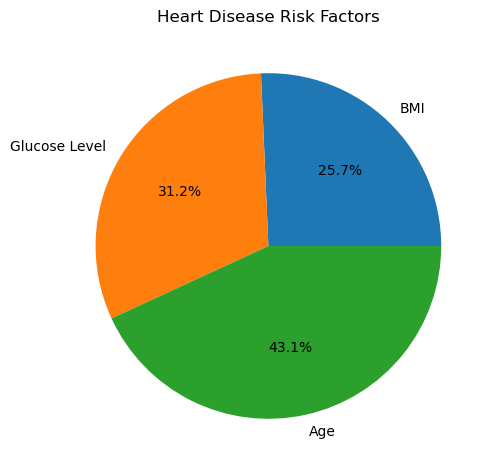

This is the division of facotrs for people who were dignosed with heart disease


In [157]:
# Create a Pie Chart showing a diagram of people with heart disease; dividing up who falls under categories of BMI, Glucose Level, and Age (Health Care)

plt.pie([Heart_Disease_BMI["stroke"].sum(), Heart_Disease_Glucose_Level["stroke"].sum(), Heart_Disease_Age["stroke"].sum()], labels=['BMI', 'Glucose Level', 'Age'], autopct='%1.1f%%')
plt.title('Heart Disease Risk Factors')
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=1.0, wspace=0.0, hspace=0.0)
plt.savefig('Heart Disease Risk Factors.png')
plt.show()

print('This is the division of facotrs for people who were dignosed with heart disease')

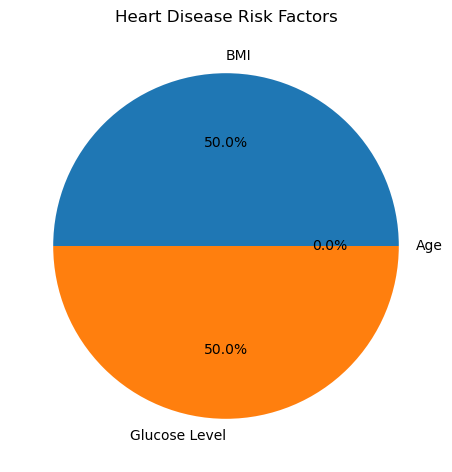

This is the division of facotrs for people who were not dignosed with heart disease
Based on the data & and this chart; it becomes clear that people with heart disease are more likely to have a higher BMI, Glucose Level, and Age
Also, there are no patients within this study who were below the median age who were diagnosed with heart disease


In [162]:
# Create a Pie Chart showing a diagram of people without heart disease; dividing up who falls under categories of BMI, Glucose Level, and Age (Health Care)

plt.pie ([Heart_Disease_BMI_below["stroke"].sum(), Heart_Disease_Glucose_Level_below["stroke"].sum(), Heart_Disease_Age_below["stroke"].sum()], labels=['BMI', 'Glucose Level', 'Age'], autopct='%1.1f%%')
plt.title('Heart Disease Risk Factors')
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=1.0, wspace=0.0, hspace=0.0)
plt.savefig('Heart Disease Risk Factors.png')
plt.show()

print('This is the division of facotrs for people who were not dignosed with heart disease')
print('Based on the data & and this chart; it becomes clear that people with heart disease are more likely to have a higher BMI, Glucose Level, and Age')
print('Also, there are no patients within this study who were below the median age who were diagnosed with heart disease')
